In [5]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle
import h5py
import pandas as pd

In [6]:
unitTime_in_Myrs = 0.07675 # Myrs
UnitDensity_in_cgs = 2.554e-18
UnitRadius_in_cm =  9.2e+16
unitVelocity =  37984.06

In [7]:
jj = 1219 #1235   # 1219 =====> 1e-13

nam = 'snap_' + str(jj).zfill(3) + '.hdf5'

file = h5py.File('/mnt/Linux_Shared_Folder_2022/GPU_sph/200k_Gad_Commercon/' + nam, 'r')

## Getting the proper time of the snapshot

In [8]:
df_info = pd.read_csv('/mnt/Linux_Shared_Folder_2022/GPU_sph/200k_Gad_Commercon/infox.csv')
x7 = df_info['x7'].values
n7 = np.where(x7 == 200000)[0]

t_arr = df_info['x3'].values

t = t_arr[n7][jj]
print('Current time in code unit = ', t)
print()
print(f'Current time in kyrs = {t*unitTime_in_Myrs*1000:.3f}')
print()
print(f'Number of Snapshots = ', len(n7))

#df_info.head()

Current time in code unit =  1.19043

Current time in kyrs = 91.366

Number of Snapshots =  1300


In [11]:
file.keys()

<KeysViewHDF5 ['Config', 'Header', 'Parameters', 'PartType0']>

In [12]:
file['Parameters']

<HDF5 group "/Parameters" (0 members)>

In [13]:
file['PartType0'].keys()

<KeysViewHDF5 ['Coordinates', 'Density', 'InternalEnergy', 'Masses', 'ParticleIDs', 'SmoothingLength', 'Velocities']>

In [14]:
coord = file['PartType0']['Coordinates']
coord

<HDF5 dataset "Coordinates": shape (200000, 3), type "<f4">

In [16]:
delta = 0.1

x = coord[:, 0]
y = coord[:, 1]
z = coord[:, 2]

In [17]:
R = (x*x + y*y + z*z)**0.5 * UnitRadius_in_cm
np.sort(R)

array([3.3652367e+13, 3.6829651e+13, 4.2374324e+13, ..., 4.0283450e+17,
       4.0350070e+17, 4.0400658e+17], dtype=float32)

In [20]:
rho = np.array(file['PartType0']['Density'])

In [21]:
np.sort(rho) * UnitDensity_in_cgs

array([4.32751296e-23, 4.64336719e-23, 4.72830510e-23, ...,
       1.03215091e-13, 1.04098594e-13, 1.04280699e-13], dtype=float32)

In [22]:
radius = (x*x + y*y + z*z)**0.5

logR = np.log10(radius)
rgrid = np.logspace(min(logR), max(logR), 40)

res = []

for i in range(len(rgrid)-1):
    
    nx = np.where((radius > rgrid[i]) & (radius <= rgrid[i+1]))[0]
    
    res.append([rgrid[i], np.mean(rho[nx])])

res = np.array(res)

R = res[:, 0] * UnitRadius_in_cm
rho = res[:, 1] * UnitDensity_in_cgs

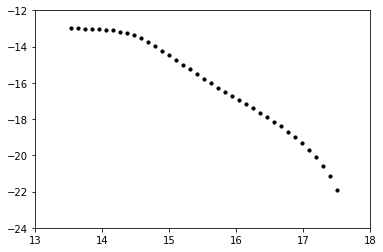

In [23]:
plt.scatter(np.log10(R), np.log10(rho), s = 10, color = 'k')
plt.xlim(13, 18)
plt.ylim(-24, -12);

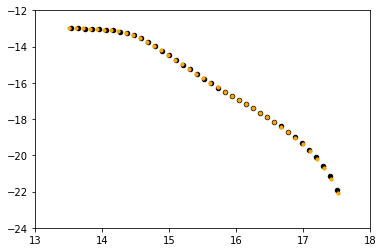

In [26]:
with open('rho_vs_r_hfvGPG.pkl', 'rb') as f:
    dictx = pickle.load(f)

rho_hfv = dictx['rho']
R_hfv = dictx['R']

plt.scatter(np.log10(R), np.log10(rho), s = 20, color = 'k')
plt.scatter(np.log10(R_hfv), np.log10(rho_hfv), s = 10, color = 'orange')
plt.xlim(13, 18)
plt.ylim(-24, -12);